In [16]:
from nb_imports import *
%matplotlib inline
import csvReader
import config
import lib



ModuleNotFoundError: No module named 'src'

In [110]:
# dtypes = {"type":str, "hash":str, "id":int, "count":int}
df = pd.read_csv("notes test.csv")

df = df.rename(columns={"count":"linecount"})

df

,id,todo,note,http,fixme,important,header,hmm,?!,explodes,dead,version,isMultiLine,linecount
0,2337852,0,0,0,0,0,0,0,0,0,0,0,0,12
1,66830040,0,0,0,0,0,0,0,0,0,0,0,0,12
2,12416862,0,0,0,0,0,1,0,0,0,0,2,8,204
3,12416862,0,0,4,0,0,0,0,0,0,0,0,5,84
4,41337249,2,0,1,0,0,0,0,0,0,0,1,1,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,59920662,0,0,0,0,0,0,0,0,0,0,0,0,12
2565,18242149,0,0,0,0,0,0,0,0,0,0,0,0,12
2566,11380094,0,0,1,0,0,0,0,0,0,0,0,1,12
2567,37060852,0,0,0,0,0,0,0,0,0,0,0,4,60


In [111]:
df.describe()

,id,todo,note,http,fixme,important,header,hmm,?!,explodes,dead,version,isMultiLine,linecount
count,2.569000e+03,2569.000000,2569.000000,2569.000000,2569.0,2569.000000,2569.000000,2569.0,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000
mean,4.370820e+07,0.008174,0.016738,0.517711,0.0,0.006228,0.142857,0.0,0.001168,0.000779,0.003503,0.475671,1.349552,54.899183
std,4.489309e+07,0.302397,0.181161,1.261002,0.0,0.078688,1.079866,0.0,0.034159,0.027896,0.071064,1.165898,2.643697,83.289999
min,2.700000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,7.147058e+06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2.911205e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,24.000000
75%,6.649366e+07,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,60.000000
max,2.205177e+08,15.000000,5.000000,32.000000,0.0,1.000000,19.000000,0.0,1.000000,1.000000,2.000000,14.000000,57.000000,1500.000000


## notes

For each type we want to get the stats on much they occur in the overall data set. In particular multi line comments.

Then remove all the empty sets and then see what the average length of each section is.

For version numbers just use it as an indication for configuration that has been commented out.

## question: percentage of files with yaml and comments what comments look like?
- we need the data on the commment format
- count of no. of files with comments!!!



In [92]:
todos = len(df[(df.type == "todo") & (df.linecount != 0)]) / len(df[(df.type == "todo")]) * 100
multi = len(df[(df.type == "isMultiLine") & (df.linecount != 0)]) / len(df[(df.type == "isMultiLine")]) * 100


test = len(df[(df.type == "todo") & (df.linecount != 0)]) + len(df[(df.type == "todo")])
print(test)
test = len(df[(df.type == "http") & (df.linecount != 0)]) + len(df[(df.type == "http")])
print(test)
test = len(df[(df.type == "isMultiLine") & (df.linecount != 0)]) + len(df[(df.type == "isMultiLine")])
print(test)

# 2569 files 

print(f"todo: {todos}")
print(f"multi: {multi}")

AttributeError: 'DataFrame' object has no attribute 'type'

In [105]:
import sys, os
sys.path.append("C:\\Users\\Joe\\workspace\\researchProject\\scraper\\")
import comments_string_analysis
comments_string_analysis.FILTERS

{'todo': {'data': [], 'search': 'todo'},
 'note': {'data': [], 'search': 'note'},
 'http': {'data': [], 'search': '(http:\\/\\/)|(https:\\/\\/)'},
 'fixme': {'data': [], 'search': 'fixme'},
 'important': {'data': [], 'search': 'important'},
 'header': {'data': [], 'search': '###|---|===|\\*\\*\\*'},
 'hmm': {'data': [], 'search': 'hmm'},
 '?!': {'data': [], 'search': '\\?\\!'},
 'explodes': {'data': [], 'search': '\\!\\!\\!'},
 'dead': {'data': [], 'search': 'dies|dead|explodes|not working'},
 'version': {'data': [], 'search': '(\\d+\\.\\d+\\.\\d+)|(\\d+\\.\\d+)'},
 'isMultiLine': {'data': [], 'search': '\\n'}}

In [114]:
df[df.todo != 0].todo / df[df.todo != 0].linecount * 100

4       0.925926
95      0.555556
1872    8.333333
2318    5.555556
2420    4.629630
dtype: float64

In [117]:
a = (df[df.http != 0].http / df[df.http != 0].linecount * 100).to_frame()
a

,0
3,4.761905
4,0.462963
6,8.333333
12,1.136364
15,8.333333
...,...
2549,6.250000
2557,1.666667
2559,2.083333
2560,8.333333


In [119]:
df[df.http != 0]

,id,todo,note,http,fixme,important,header,hmm,?!,explodes,dead,version,isMultiLine,linecount
3,12416862,0,0,4,0,0,0,0,0,0,0,0,5,84
4,41337249,2,0,1,0,0,0,0,0,0,0,1,1,216
6,1272129,0,0,1,0,0,0,0,0,0,0,0,1,12
12,3431193,0,1,3,0,0,0,0,0,0,0,6,6,264
15,27587921,0,0,3,0,0,0,0,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,34864402,0,0,3,0,0,0,0,0,0,0,0,3,48
2557,94218531,0,0,1,0,0,0,0,0,0,0,0,1,60
2559,186024298,0,0,2,0,0,0,0,0,0,0,1,1,96
2560,3354902,0,0,1,0,0,0,0,0,0,0,0,1,12


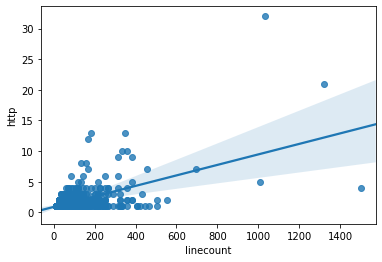

In [121]:
sns.regplot(x="linecount", y="http", data=df[df.http != 0])

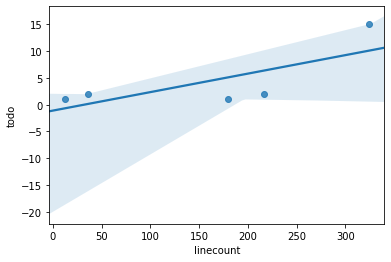

In [122]:
sns.regplot(x="linecount", y="todo", data=df[df.todo != 0])

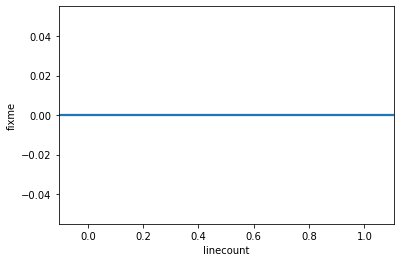

In [123]:
sns.regplot(x="linecount", y="fixme", data=df[df.fixme != 0])

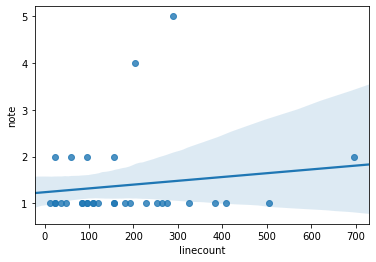

In [124]:
sns.regplot(x="linecount", y="note", data=df[df.note != 0])

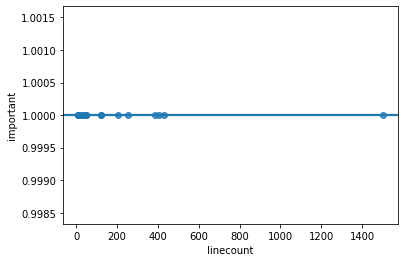

In [125]:
sns.regplot(x="linecount", y="important", data=df[df.important != 0])

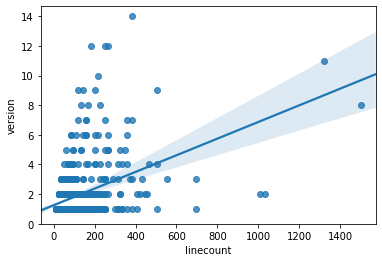

In [126]:
sns.regplot(x="linecount", y="version", data=df[df.version != 0])

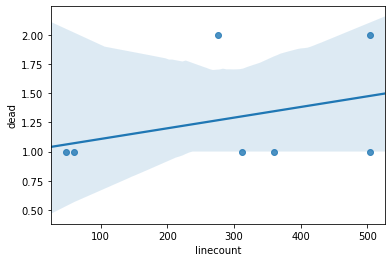

In [161]:
sns.regplot(x="linecount", y="dead", data=df[df.dead != 0])

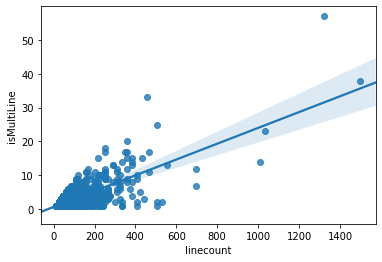

In [127]:
sns.regplot(x="linecount", y="isMultiLine", data=df[df.isMultiLine != 0])

In [159]:
from scipy import stats
dataset = df[df.isMultiLine != 0] 
dataset = [dataset[(np.abs(stats.zscore(dataset)) < 4)]]
# [(np.abs(stats.zscore()) < 3).all(axis=1)]


C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
sns.regplot(x="linecount", y="isMultiLine", data=dataset)

TypeError: list indices must be integers or slices, not str

## results

There doesn't seem to be that much relation to the number of lines in a file and what kind of comments it has.


Only really potentail is the increase of the version check one. But that I don't think is concrete enough to be draw a conclusion from.



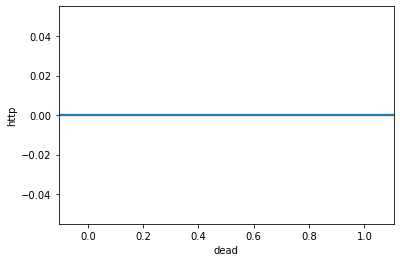

In [164]:
sns.regplot(x="dead", y="http", data=df[(df.dead != 0) & (df.todo != 0)])